# **1. Preparing Steps**


## **1.1 Install libraries**


In [70]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install graphviz
!pip install plotly
!pip install nbformat
!pip install joblib


In [237]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import shuffle
import plotly.express as px
import plotly.graph_objects as go
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [238]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo


## **1.2 Helper Functions**


In [321]:
# Function to load the Breast Cancer Wisconsin dataset
def load_data():
    """
    Load and preprocess the Breast Cancer Wisconsin (Diagnostic) dataset.

    This function fetches the Breast Cancer Wisconsin (Diagnostic) dataset using the `ucimlrepo` library.
    The dataset is then shuffled to ensure randomness, and the features (predictor variables) and labels (target variable)
    are extracted and returned.

    Returns:
        tuple:
            - features (numpy.ndarray): A numpy array containing the feature data of the dataset.
            - labels (numpy.ndarray): A numpy array containing the target labels of the dataset.
            - features_name (list): A list of strings representing the names of the features in the dataset.

    """
    # Fetch the dataset using the ucimlrepo library
    breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

    # Extract features (predictor variables) from the dataset
    features = breast_cancer_wisconsin_diagnostic.data.features

    # Extract labels (target variable) from the dataset
    labels = breast_cancer_wisconsin_diagnostic.data.targets

    # Extract the names of the features
    features_name = breast_cancer_wisconsin_diagnostic.data.feature_names

    # Shuffle the features and labels to ensure random distribution
    features_shuffle, labels_shuffle = shuffle(
        features, labels, random_state=42
    )  # shuffle the data before splitting

    # Return the features, labels, and feature names
    return features_shuffle, labels_shuffle, features_name


In [322]:
def split_data(features, labels, train_size, test_size):
    """
    Split the dataset into training and testing sets.
    This function splits the input features and labels into training and testing sets based on the specified proportions.
    The split is stratified, ensuring that the distribution of the labels is preserved in both the training and testing sets.
    Args:
        features (numpy.ndarray): The feature data to be split.
        labels (numpy.ndarray): The target labels to be split.
        train_size (float): The proportion of the dataset to include in the training set (e.g., 0.8 for 80%).
        test_size (float): The proportion of the dataset to include in the testing set (e.g., 0.2 for 20%).
    Returns:
        tuple:
            - feature_train (numpy.ndarray): The features for the training set.
            - feature_test (numpy.ndarray): The features for the testing set.
            - label_train (numpy.ndarray): The labels for the training set.
            - label_test (numpy.ndarray): The labels for the testing set.
    """

    feature_train, feature_test, label_train, label_test = train_test_split(
        features,
        labels,
        train_size=train_size,
        test_size=test_size,
        stratify=labels,
        random_state=42,
    )  # spliting data in a stratified fashion

    return (feature_train, feature_test, label_train, label_test)


In [323]:
def create_datasets(features, labels, split_ratios):
    """
    Create training and test datasets from the given split ratios.
    Args:
        features (array-like): An array or DataFrame containing the input features.
        labels (array-like): An array or Series containing the labels corresponding to the features.
        split_ratios (list of tuples): A list of tuples where each tuple contains the train and test split ratios.
    Returns:
        list of tuples: A list of tuples, each containing four elements:
                        training features, test features, training labels, and test labels.
    """
    datasets = []  # Initialize an empty list to store the datasets.
    # Iterate over each split ratio provided.
    for train_size, test_size in split_ratios:
        # Split the data into training and test sets according to the given ratios.
        feature_train, feature_test, label_train, label_test = split_data(
            features, labels, train_size, test_size
        )
        # Append the resulting split data to the datasets list.
        datasets.append((feature_train, feature_test, label_train, label_test))

    return datasets  # Return the list of datasets.


# **2. Preparing the data sets**


## **2.1 Create training and test sets of different proportions**


In [324]:
features_shuffle, labels_shuffle, features_name = load_data()


In [325]:
features_shuffle.head()


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


In [326]:
features_shuffle.describe()


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [327]:
labels_shuffle.head()


,Diagnosis
204,B
70,M
131,M
431,B
540,B


In [328]:
labels_shuffle.describe()


,Diagnosis
count,569
unique,2
top,B
freq,357


In [329]:
features_data = features_shuffle.values
labels_data = labels_shuffle.values


In [330]:
# Create datasets with different ratios
split_ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
datasets = create_datasets(features_data, labels_data, split_ratios)


## **2.2 Visualize the distribution of classes in all the data sets**


In [331]:
def visualize_distribution_plotly(listDatasets, listProportions, original_labels):
    """
    Visualizes the distribution of labels across the original, training, and testing datasets
    using bar plots generated with Plotly.
    Args:
        listDatasets (list): A list of tuples, where each tuple contains the training and testing
                             features and labels (feature_train, feature_test, label_train, label_test).
        listProportions (list): A list of tuples representing the proportions of the training and
                                testing sets (training_size, testing_size).
        original_labels (numpy.ndarray): The original labels before splitting into training and testing sets.
    Returns:
        None: Displays the bar plots for each dataset proportion using Plotly.
    """
    # Flatten the original labels if they are multidimensional

    if original_labels.ndim > 1:

        original_labels = original_labels.flatten()
    # Get a list of unique labels

    listLabels = list(np.unique(original_labels))
    # Calculate the counts for each label in the original set

    originalSet_labelCounts = list(
        pd.Series(original_labels)
        .value_counts()
        .reindex(listLabels, fill_value=0)
        .values
    )
    # Loop through each dataset corresponding to each proportion

    for i, proportion in enumerate(listProportions):
        # Prepare statistics
        _, _, label_train, label_test = listDatasets[i]

        # Flatten the training and testing labels if they are multidimensional
        if label_train.ndim > 1:
            label_train = label_train.flatten()
        if label_test.ndim > 1:
            label_test = label_test.flatten()
        # Calculate the counts for each label in the training set

        trainingSet_labelCounts = list(
            pd.Series(label_train)
            .value_counts()
            .reindex(listLabels, fill_value=0)
            .values
        )
        # Calculate the counts for each label in the testing set
        testingSet_labelCounts = list(
            pd.Series(label_test)
            .value_counts()
            .reindex(listLabels, fill_value=0)
            .values
        )

        # Create x_coordinates for each data
        x = np.arange(0, len(listLabels))

        # Set the width of each bar
        width = 0.25

        # Create the figure

        fig = go.Figure()

        # Add the bars for the original dataset
        fig.add_trace(
            go.Bar(
                x=x - width,
                y=originalSet_labelCounts,
                width=width,
                name="Original Set",
                text=listLabels,
                hoverinfo="x+y+text",
                marker_color=px.colors.qualitative.Plotly[0],
            )
        )

        # Add the bars for the training dataset
        fig.add_trace(
            go.Bar(
                x=x,
                y=trainingSet_labelCounts,
                width=width,
                name="Training Set",
                text=listLabels,
                hoverinfo="x+y+text",
                marker_color=px.colors.qualitative.Plotly[1],
            )
        )

        # Add the bars for the testing dataset
        fig.add_trace(
            go.Bar(
                x=x + width,
                y=testingSet_labelCounts,
                width=width,
                name="Testing Set",
                text=listLabels,
                hoverinfo="x+y+text",
                marker_color=px.colors.qualitative.Plotly[2],
            )
        )

        # Update the layout
        fig.update_layout(
            title=f"Data Distribution - Proportion ({proportion[0]}, {proportion[1]})",
            xaxis=dict(
                title="Class", tickmode="array", tickvals=x, ticktext=listLabels
            ),
            yaxis=dict(title="Count"),
            barmode="group",
            legend_title_text="Dataset",
        )

        # Optionally, display the figure

        fig.show()


In [332]:
visualize_distribution_plotly(datasets, split_ratios, labels_data)


# **3. Building the decision tree classifiers**


## **3.1 Training model decision tree classifiers with different split ratios**


In [333]:
def build_decision_tree_classifiers(datasets, split_ratios, random_state=42):
    """
    Builds and trains decision tree classifiers for different train/test split ratios.

    Args:
        datasets (list of tuples): A list of tuples, each containing the training and testing features and labels.
        split_ratios (list of tuples): A list of tuples representing the train/test split ratios.
        random_state (int, optional): Controls the randomness of the estimator. Defaults to 42.

    Returns:
        list: A list of trained DecisionTreeClassifier models.
    """

    # Initialize an empty list to store the trained models
    list_models: list[DecisionTreeClassifier] = []

    # Iterate over each dataset and corresponding split ratio
    for (feature_train, _, label_train, _), (train_size, test_size) in zip(
        datasets, split_ratios
    ):

        # Initialize a Decision Tree classifier with entropy as the criterion and a fixed random state
        model = DecisionTreeClassifier(
            criterion="entropy",  # Use 'entropy' to measure the quality of a split
            splitter="best",  # Choose the best split at each node
            random_state=random_state,  # Ensure reproducibility of the model
        )

        # Fit the model on the training data
        model.fit(feature_train, label_train)

        # Append the trained model to the list of models
        list_models.append(model)

        # Define the filename for saving the model, including the train/test split in the name
        model_filename = f"model\split_ratios_ver\model_decision_tree_{int(train_size*100)}_{int(test_size*100)}.pkl"

        # Save the trained model to a file using joblib
        joblib.dump(model, model_filename)

    # Return the list of trained models
    return list_models


In [334]:
list_models = build_decision_tree_classifiers(datasets, split_ratios)


## **3.2 Visualize decision trees with different split ratios**


In [335]:
def visualize_decision_tree(list_models, split_ratios, feature_name, class_name):
    """
    Visualizes and saves decision tree models for different train/test splits.

    Args:
        list_models (list): A list of trained decision tree models.
        split_ratios (list of tuples): A list of tuples, each containing the train/test split ratios as floats.
        feature_name (list): A list of feature names for the dataset.
        class_name (list): A list of class names corresponding to the target labels.
    """

    # Iterate over each model and corresponding split ratio
    for model, proportion in zip(list_models, split_ratios):

        # Export the decision tree model as dot data with specific visual parameters
        dot_data = export_graphviz(
            model,  # The decision tree model to be visualized
            feature_names=feature_name,  # Feature names used in the model
            class_names=class_name,  # Class names for the target labels
            filled=True,  # Fill nodes with colors
            rounded=True,  # Round node shapes for better visualization
            special_characters=True,  # Allow special characters in the graph
        )

        # Create a graph object from the dot data
        graph = graphviz.Source(dot_data)
        graph.engine = "dot"  # Ensure 'dot' engine is used to render the graph

        # Render the graph to a file
        graph.render(
            f"output/split_ratios_graphviz/graph_model_{int(proportion[0]*100)}_{int(proportion[1]*100)}",  # File path and name
            format="png",  # Save the graph as a PNG image
            cleanup=True,  # Remove temporary files created during the process
        )

        # Display the graph within the Jupyter notebook (or other interactive environment)
        display(graph)

        # Print a message indicating the completion of the visualization process for the current split ratio
        print(
            f"Decision tree classifier for train/test split {int(proportion[0]*100)}:{int(proportion[1]*100)} built, visualized, and saved."
        )


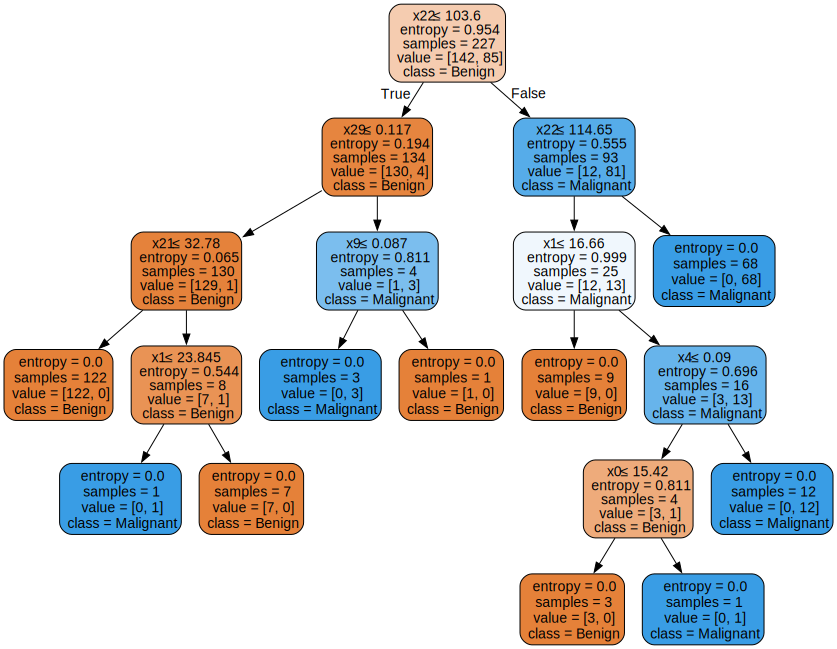

Decision tree classifier for train/test split 40:60 built, visualized, and saved.


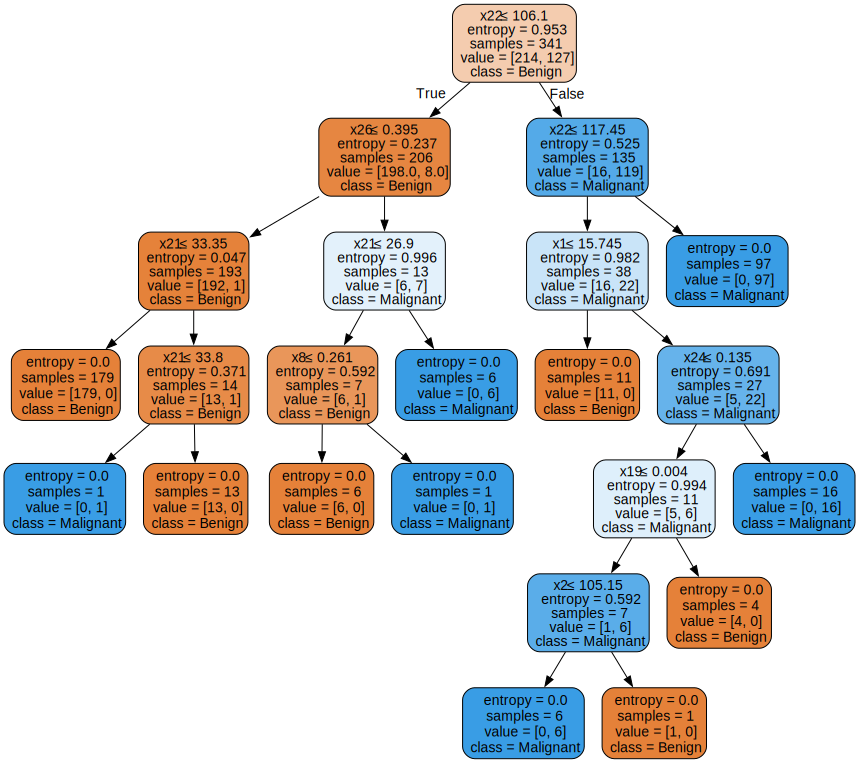

Decision tree classifier for train/test split 60:40 built, visualized, and saved.


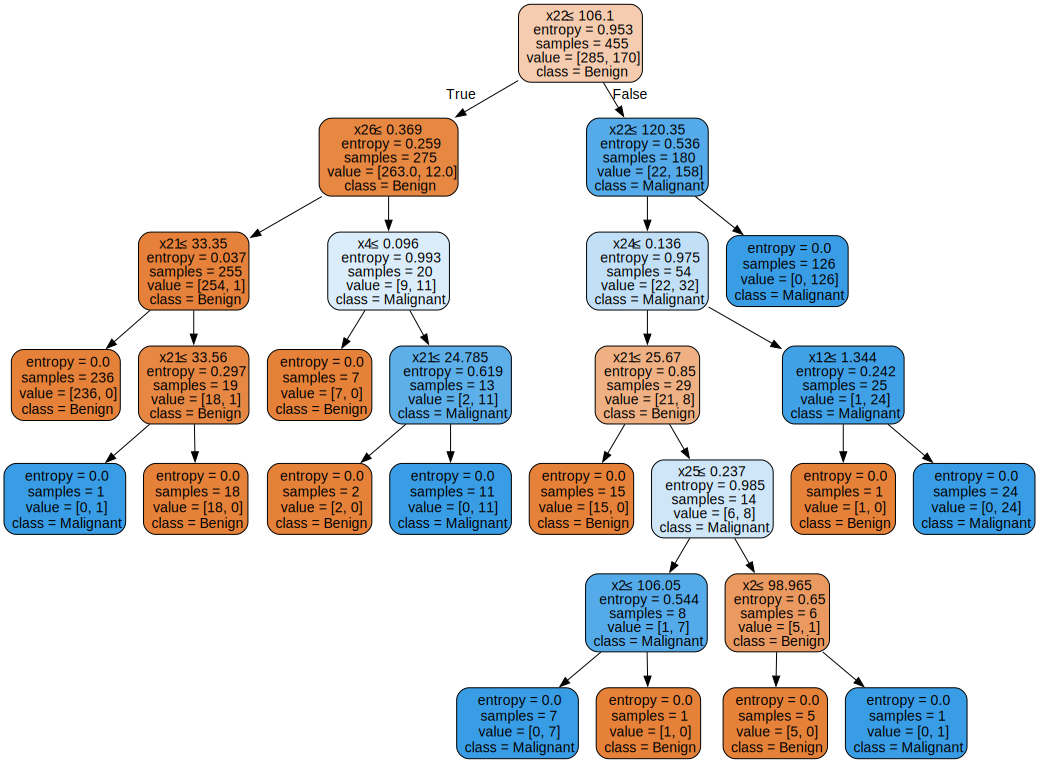

Decision tree classifier for train/test split 80:20 built, visualized, and saved.


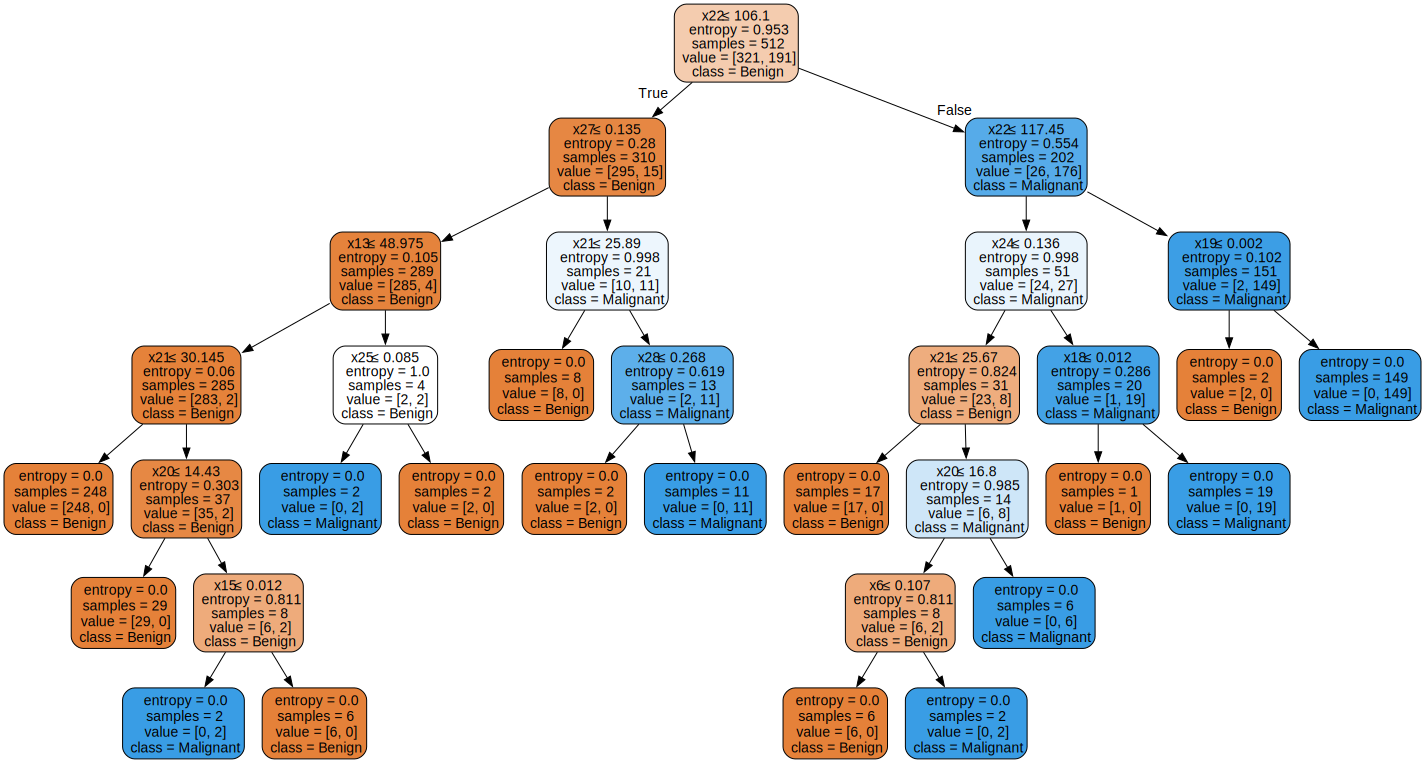

Decision tree classifier for train/test split 90:10 built, visualized, and saved.


In [336]:
class_name = ["Benign", "Malignant"]
visualize_decision_tree(list_models, split_ratios, features_name, class_name)


# **4. Evaluating the decision tree classifiers**

## **4.1 Visualize confusion matrix and classification report**


In [337]:
def evaluating_models(list_models, datasets, split_ratios):
    """
    Evaluates a list of machine learning models on given datasets and generates
    classification reports and confusion matrices visualized as heatmaps.

    Args:
        list_models (list): List of trained machine learning models.
        datasets (list): List of tuples, where each tuple contains the training and
                         test features and labels (feature_train, feature_test,
                         label_train, label_test).
        split_ratios (list): List of tuples representing the training and testing
                             split ratios.

    Returns:
        None: Saves the classification report and heatmap as an image file for each model.
    """
    for (
        model,
        (feature_train, feature_test, label_train, label_test),
        proportion,
    ) in zip(list_models, datasets, split_ratios):
        # Predict labels using the trained model
        label_prediction = model.predict(feature_test)

        # Generate a classification report based on true and predicted labels
        report = classification_report(
            label_test, label_prediction, zero_division=1, digits=4
        )

        # Generate a confusion matrix based on true and predicted labels
        matrix = confusion_matrix(label_test, label_prediction)

        # Create a new figure for the plots, adjusting the figure size
        plt.figure(figsize=(15, 8))  # Adjusted figure size

        # Left subplot for the classification report table
        plt.subplot(1, 2, 1)

        # Split the classification report into lines
        report_lines = report.strip().split("\n")

        # Extract class labels from the report lines
        class_labels = [line.split()[0] for line in report_lines[2:-4]]

        # Extract the data for precision, recall, f1-score, and support for each class
        data = [line.split()[1:] for line in report_lines[2:-4]]

        # Labels and data for the accuracy, macro avg, and weighted avg
        statistical_class_labels = ["accuracy", "macro avg", "weighted avg"]
        statistical_data = []
        for i in range(-3, 0):
            if i == -3:
                # Special case for accuracy, which has a slightly different format
                lst = [" ", " "]  # Empty cells for class label and first column
                lst += report_lines[i].split()[1:]  # Append the remaining data
                statistical_data.append(lst)
            else:
                # Extract data for macro avg and weighted avg
                statistical_data.append(report_lines[i].split()[2:])

        # Create a table for the main classification metrics (precision, recall, f1-score, support)
        table = plt.table(
            cellText=data,
            colLabels=["precision", "recall", "f1-score", "support"],
            rowLabels=class_labels,
            loc="center",
            cellLoc="center",
            colWidths=[0.15, 0.15, 0.15, 0.15],  # Adjusted column widths
            bbox=[
                0.2,  # Adjust this value to move the table horizontally (increase to move right)
                0.45,
                0.6,  # Adjust this value to change the width of the table (increase to center)
                0.4,
            ],  # Adjust the bounding box (left, bottom, width, height)
        )

        # Scale the table and adjust the font size
        table.auto_set_font_size(False)
        table.set_fontsize(10)

        # Adjust the height of each row in the table
        for (i, j), cell in table.get_celld().items():
            cell.set_edgecolor(
                "white"
            )  # Set cell edge color to white (or background color)
            cell.set_height(0.1)  # Adjust the height to make rows evenly spaced
            cell.set_width(0.2)  # Adjust the width to make columns evenly spaced
            cell.set_text_props(
                ha="center", va="center"
            )  # Center align the text horizontally and vertically

        # Create a table for statistical metrics (accuracy, macro avg, weighted avg)
        statistical_table = plt.table(
            cellText=statistical_data,
            rowLabels=statistical_class_labels,
            loc="lower center",
            cellLoc="center",
            colWidths=[0.15, 0.15, 0.15, 0.15],  # Adjusted column widths
            bbox=[
                0.3,
                0,
                0.5,
                0.4,
            ],  # Adjust the bounding box (left, bottom, width, height)
        )

        # Scale the statistical table and adjust the font size
        statistical_table.auto_set_font_size(False)
        statistical_table.set_fontsize(10)

        # Adjust the height of each row in the statistical table
        for (i, j), cell in statistical_table.get_celld().items():
            cell.set_edgecolor(
                "white"
            )  # Set cell edge color to white (or background color)
            cell.set_height(0.1)  # Adjust the height to make rows evenly spaced
            cell.set_width(0.2)  # Adjust the width to make columns evenly spaced
            cell.set_text_props(
                ha="center", va="center"
            )  # Center align the text horizontally and vertically

        # Turn off the axes for the table subplot
        plt.axis("off")

        # Set the title for the classification report subplot
        plt.title("Classification Report")

        # Right subplot for the confusion matrix heatmap
        plt.subplot(1, 2, 2)

        # Generate a heatmap for the confusion matrix without cell lines
        sns.heatmap(
            matrix,
            annot=True,  # Annotate the cells with the confusion matrix values
            cmap="magma",  # Set the colormap for the heatmap
            fmt="d",  # Format the annotation as integers
            cbar=True,  # Include the color bar
            xticklabels=model.classes_,  # Set the x-axis tick labels to class names
            yticklabels=model.classes_,  # Set the y-axis tick labels to class names
            linewidths=0,  # Remove lines to separate cells
        )

        # Set the x-axis and y-axis labels
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")

        # Set the title for the heatmap subplot
        plt.title("Confusion Matrix")

        # Set the main title for the figure
        plt.suptitle(f"Decision Tree Classifier, Proportion: {proportion}", fontsize=16)

        # Adjust the layout and title space to prevent overlap
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        # Save the figure to a file
        plt.savefig(
            f"output/report/split_ratios_ver/report_model_{int(proportion[0]*100)}_{int(proportion[1]*100)}.png"
        )

        # Display the figure
        plt.show()  # Display the plot immediately after creation


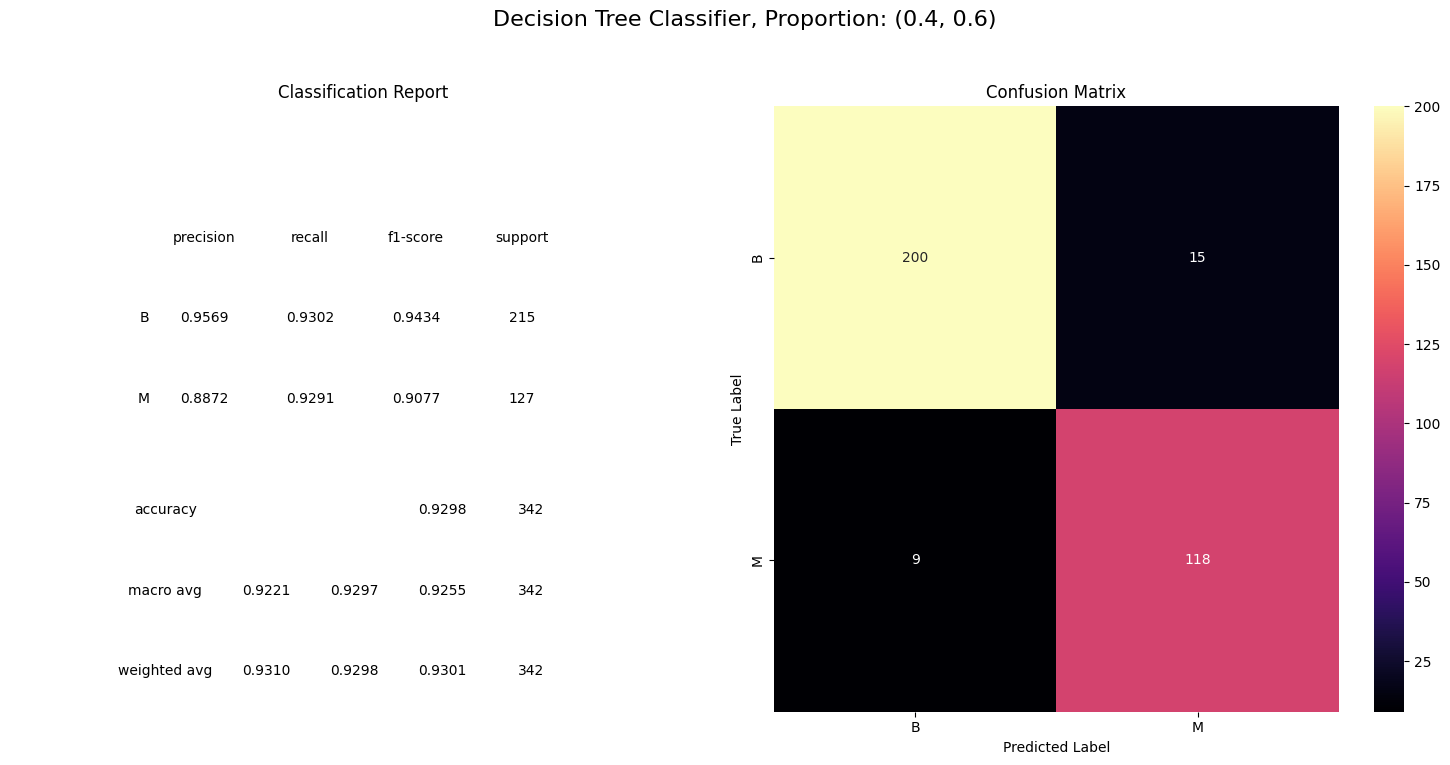

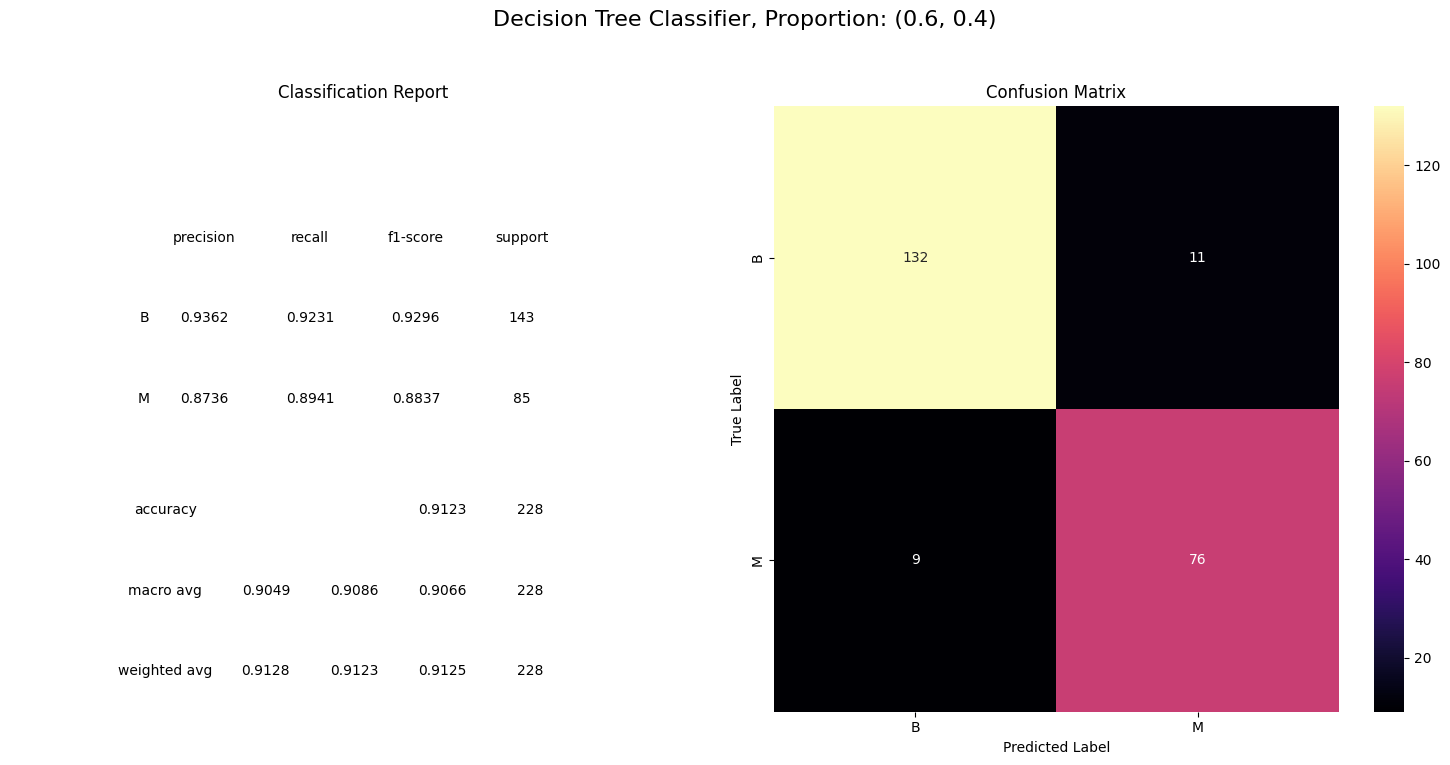

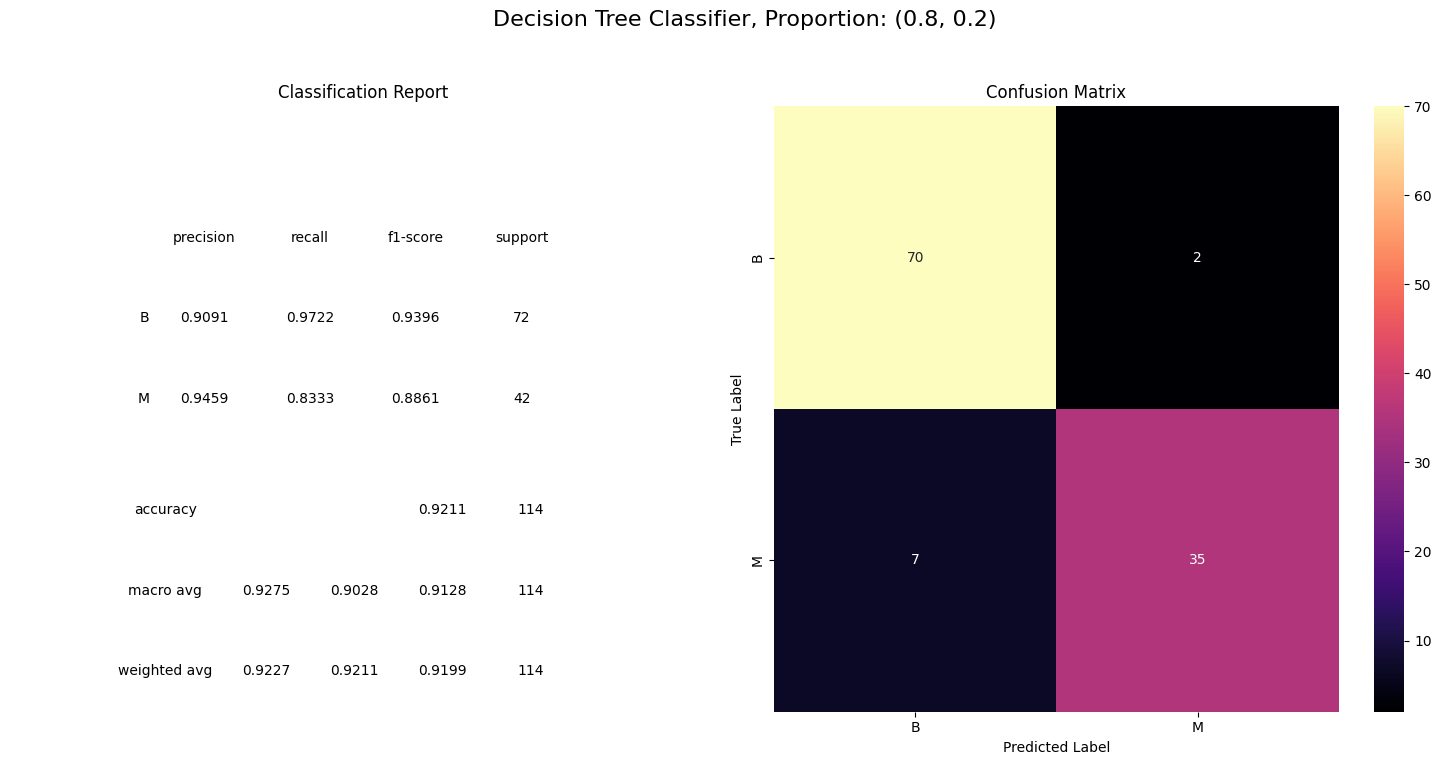

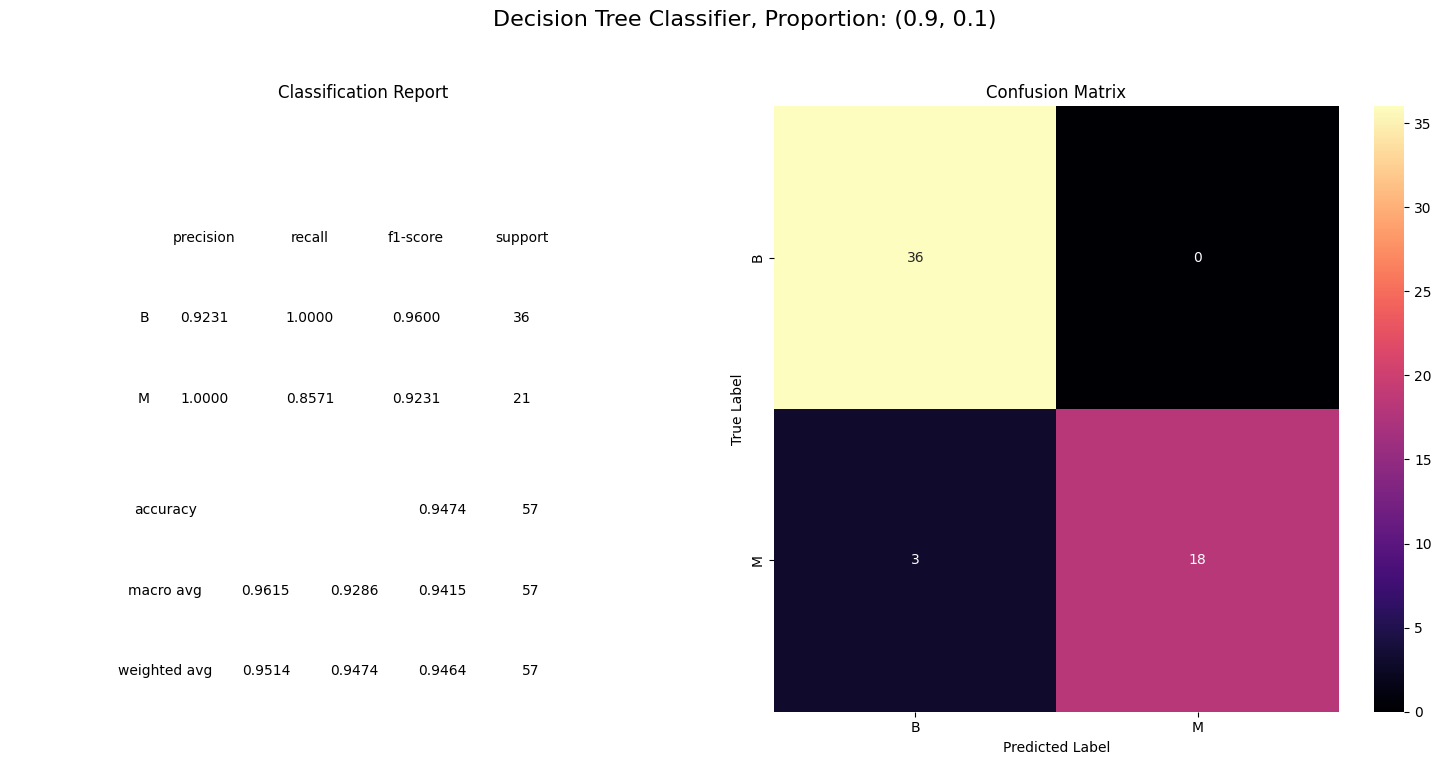

In [338]:
evaluating_models(list_models, datasets, split_ratios)


## **4.2 Comments on the performances of those decision tree classifiers**


- **Decision Tree Classifiers with Proportion 40 Train - 60 Test**
  - _Classification Report_
    - Accuracy: the overall accuracy is $92.98\%$.
    - Precision, Recall, F1-Score, Support
      - Class `Benign` (B)
        - Precision: $95.69\% \to$ out of all instances predicted as "Benign" (B), $96\%$ were actually benign. This is high precision score, indicating that model has few false positive for benign cases.
        - Recall: $93.02\% \to$ the model correctly identified $93\%$ of the actual benign cases. This indicates a strong ability to capture most benign cases, though it missed about $7%$.
        - F1-Score: $94.34\% \to$ the F1-Score is $94\%$, which is a good balance between precision and recall, indicating strong performance in predicting benign cases.
      - Class `Malignant` (M)
        - Precision: $88.72\% \to$ out of all instances predicted as malignant, $89\%$ were actually. While slightly lower than for benign cases, this is still a relatively high precision, showing the model's reliability in predicting malignant cases.
        - Recall: $92.91\% \to$ Similarly, the model correctly identified $93\%$ of the actual malignant cases. This high recall means the model is effective at detecting malignant tumors.
        - F1-Score: $90.77\% \to$ the F1-Score is $91\%$, which is a good balance between precision and recall, reflecting solid performance in predicting malignant cases.
  - _Comments_
    - The model performs well on both benign and malignant cases, with slightly better performance on benign cases.
    - The high precision and recall for both classes indicate that the model has a good balance of sensitivity (ability to correctly identify positives) and specificity (ability to correctly identify negatives).
    - The slight drop in precision for malignant cases suggests that there may be some instances where benign cases are incorrectly classified as malignant, but this is not a major concern given the overall high scores.
  - _Confusion Matrix_
    - True Positive (TP) for B: $200 \to$ the number of benign cases correctly predicted.
    - True Positive (TP) for M: $118 \to$ the number of malignant cases correctly predicted.
    - False Positive (FP) for B: $15 \to$ the number of cases predicted as benign but are actually malignant.
    - False Positive (FP) for M: $9 \to$ the number of cases predicted as malignant but are actually benign.
- **Decision Tree Classifiers with Proportion 60 Train - 40 Test**
  - _Classification Report_
    - Accuracy: the overall accuracy is $91.23\to$ the lowest accuracy score, indicates that the model correctly classified about $92\%$ of the cases in the test set $\to$ still demonstrates a fairly strong performance.
    - Precision, Recall, F1-Score, Support
      - Class `Benign` (B)
        - Precision: $93.62\% \to$ Very high, meaning that $93.62\%$ of the cases predicted as benign are actually benign.
        - Recall: The ability to correctly identify benign cases is approximately $92.31\%$.
        - F1-Score: $92.96\% \to$ This is a balance between precision and recall, showing strong performance in predicting benign cases.
      - Class `Malignant` (M)
        - Precision: $87.36\% \to$ Slightly lower than benign, but still good with $87.36\%$ of the cases predicted as malignant being correct.
        - Recall: $89.41\% \to$ Very high, indicating that the model correctly identifies 94.12% of malignant cases.
        - F1-Score: $88.37\%$ Strong enough to suggest that the model doesn't miss too many malignant cases, with a relatively low number of false negatives and false positives.
  - _Comments_
    - The model with the 60/40 data split performs quite well with high accuracy, especially in detecting malignant cases (M). However, the precision for the malignant class is slightly lower, which means the model may need further improvement to reduce the number of false positives in the malignant class.
  - _Confusion Matrix_
    - True Positive (TP) for B: 132 - The number of benign cases correctly predicted.
    - True Positive (TP) for M: 76 - The number of malignant cases correctly predicted.
    - False Positive (FP) for B: 11 - The number of cases predicted as benign but are actually malignant.
    - False Negative (FN) for M: 9 - The number of cases predicted as malignant but are actually benign.
- **Decision Tree Classifiers with Proportion 80 Train - 20 Test**
  - _Classification Report_
    - Accuracy: the overall accuracy is $92.11\%$
    - Precision, Recall, F1-Score, Support
      - Class `Benign` (B)
        - Precision: $90.91\% \to$ Very High, meaning that $90.91\%$ of the cases predicted as benign are actually benign.
        - Recall: $97.22\% \to$ The ability to correctly identify benign cases is approximately $97.22\%$.
        - F1-Score: $93.96\% \to$ This is a balance between precision and recall, showing strong performance in predicting benign cases.
      - Class `Malignant` (M)
        - Precision: $94.59\% \to$ Slightly higher than benign, but still good with $94.59\%$ of the cases predicted as malignant being correct.
        - Recall: $83.33\% \to$ Very low, indicating that the model correctly identifies $83.33\%$ of malignant cases.
        - F1-Score: $88.61\% \to$ Strong enough to suggest that the model doesn't miss too many malignant cases, with a relatively low number of false negatives and false positives.
  - _Confusion Matrix_
    - True Positive (TP) for B: 70 - The number of benign cases correctly predicted.
    - True Positive (TP) for M: 35 - The number of malignant cases correctly predicted.
    - False Positive (FP) for B: 2 - The number of cases predicted as benign but are actually malignant.
    - False Negative (FN) for M: 8 - The number of cases predicted as malignant but are actually benign.
- **Decision Tree Classifiers with Proportion 90 Train - 10 Test**
  - _Classification Report_
    - Accuracy: the overall accuracy is $94.74\% \to$ the highest accuracy score.
    - Precision, Recall, F1-Score, Support
      - Class `Benign` (B)
        - Precision: $92.31\% \to$ Very high, meaning that $92.31\%$ of the cases predicted as benign are actually benign.
        - Recall: $100\% \to$ The ability to correctly identify benign cases is approximately $100\%$.
        - F1-Score: $96\% \to$ This is a balance between precision and recall, showing strong performance in predicting benign cases.
      - Class `Malignant` (M)
        - Precision: $100\% \to$ is good with $100\%$ of the cases predicted as malignant being correct.
        - Recall: $85.71\% \to$ Very high, indicating that the model correctly identifies $85.71\%$ of malignant cases.
        - F1-Score: $92.31\% \to$ the F1-Score is $92.31\%$, which is a good balance between precision and recall, reflecting solid performance in predicting malignant cases.
  - _Confusion Matrix_
    - True Positive (TP) for B: 36 - The number of benign cases correctly predicted.
    - True Positive (TP) for M: 18 - The number of malignant cases correctly predicted.
    - False Positive (FP) for B: 0 - The number of cases predicted as benign but are actually malignant.
    - False Negative (FN) for M: 3 - The number of cases predicted as malignant but are actually benign.


# **5. The depth and accuracy of a decision tree**


## **5.1 Training model with max depth of decision tree**


In [339]:
list_max_depth = [2, 3, 4, 5, 6, 7, None]


def max_depth_model_decision_tree(datasets, list_max_depth):
    """
    Trains decision tree classifiers with varying maximum depths and evaluates their accuracy.

    Args:
        datasets (tuple): A tuple containing the training and testing features and labels.
        list_max_depth (list of int): A list of integers representing the maximum depth values to be used for training different decision tree models.

    Returns:
        tuple: A tuple containing:
            - list: A list of trained DecisionTreeClassifier models, each corresponding to a max_depth from list_max_depth.
            - dict: A dictionary mapping each max_depth to its corresponding accuracy on the test set.
    """

    # Initialize an empty dictionary to store accuracy results for each max_depth
    accuracy_results_dict = {}

    # Extract the training and testing data from the datasets (corresponding to a proportion of 80/20)
    feature_train, feature_test, label_train, label_test = datasets[2]

    # Initialize an empty list to store the trained models
    list_max_depth_model: list[DecisionTreeClassifier] = []

    # Iterate over the list of max_depth values
    for max_depth in list_max_depth:
        # Initialize a Decision Tree classifier with the specified max_depth and entropy as the criterion
        model = DecisionTreeClassifier(
            criterion="entropy",  # Use 'entropy' to measure the quality of a split
            max_depth=max_depth,  # Set the maximum depth of the tree
            random_state=42,  # Ensure reproducibility of the model
        )

        # Train the model on the training data
        model.fit(feature_train, label_train)

        # Append the trained model to the list
        list_max_depth_model.append(model)

        # Make predictions on the test data
        label_pred = model.predict(feature_test)

        # Calculate the accuracy of the model
        accuracy_result = accuracy_score(label_test, label_pred)

        # Store the accuracy result in the dictionary with max_depth as the key
        accuracy_results_dict[max_depth] = accuracy_result

        # Save the trained model to a file with a name reflecting the max_depth
        model_filename = (
            f"model/max_depth_ver/model_decision_tree_max_depth_{max_depth}.pkl"
        )
        joblib.dump(model, model_filename)
        print(f"Model saved to {model_filename}")

    # Return the list of models and the dictionary of accuracy results
    return list_max_depth_model, accuracy_results_dict


In [340]:
list_max_depth_model, accuracy_results = max_depth_model_decision_tree(
    datasets, list_max_depth
)


Model saved to model/max_depth_ver/model_decision_tree_max_depth_2.pkl
Model saved to model/max_depth_ver/model_decision_tree_max_depth_3.pkl
Model saved to model/max_depth_ver/model_decision_tree_max_depth_4.pkl
Model saved to model/max_depth_ver/model_decision_tree_max_depth_5.pkl
Model saved to model/max_depth_ver/model_decision_tree_max_depth_6.pkl
Model saved to model/max_depth_ver/model_decision_tree_max_depth_7.pkl
Model saved to model/max_depth_ver/model_decision_tree_max_depth_None.pkl


## **5.2 Visualize decision trees with each `max_depth` value.**


In [341]:
def visualize_max_depth(
    list_max_depth_model, list_max_depth, features_name, class_name
):
    """
    Visualizes and saves decision tree models with varying maximum depths.

    Args:
        list_max_depth_model (list of DecisionTreeClassifier):
            A list of trained DecisionTreeClassifier models, each with a different maximum depth.
        list_max_depth (list of int):
            A list of integers representing the maximum depths used to train the models.
        features_name (list of str):
            A list of feature names used in the decision tree models.
        class_name (list of str):
            A list of class names corresponding to the target variable in the dataset.
    """

    # Iterate over the list of models and corresponding max_depth values
    for model, max_depth in zip(list_max_depth_model, list_max_depth):

        # Export the decision tree model into Graphviz dot format
        dot_data = export_graphviz(
            model,
            feature_names=features_name,  # Feature names for splitting
            class_names=class_name,  # Class names for output labels
            filled=True,  # Color nodes to reflect class purity
            rounded=True,  # Rounded corners for better visualization
            special_characters=True,  # Use special characters in class names
        )

        # Create a Graphviz graph object from the dot data
        graph = graphviz.Source(dot_data)
        graph.engine = "dot"  # Set the engine to 'dot' for rendering the graph

        # Render and save the graph as a PNG image in the specified directory
        graph.render(
            f"output/max_depth_graphviz/graph_model_80_20_with_depth_{max_depth}",
            format="png",  # Save the file as a PNG image
            cleanup=True,  # Remove intermediate files after rendering
        )

        # Display the graph inline (useful in Jupyter notebooks or similar environments)
        display(graph)

        # Print a confirmation message with the max_depth value
        print(
            f"Decision tree classifier for train/test split 80:20 with max depth of {max_depth} built, visualized, and saved."
        )


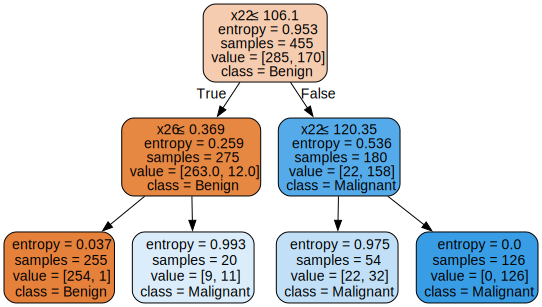

Decision tree classifier for train/test split 80:20 with max depth of 2 built, visualized, and saved.


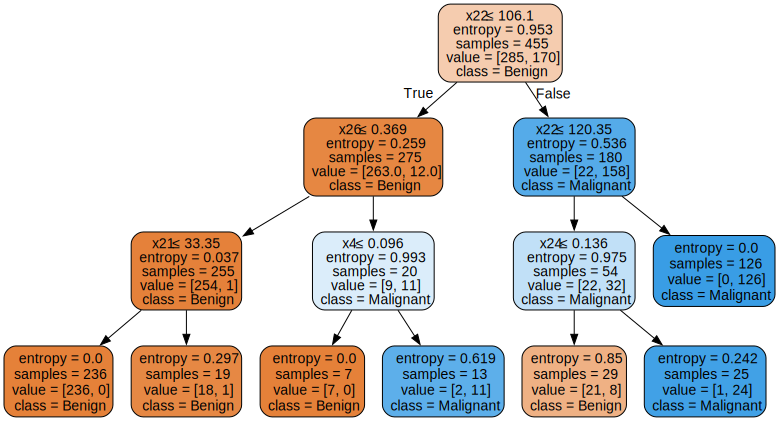

Decision tree classifier for train/test split 80:20 with max depth of 3 built, visualized, and saved.


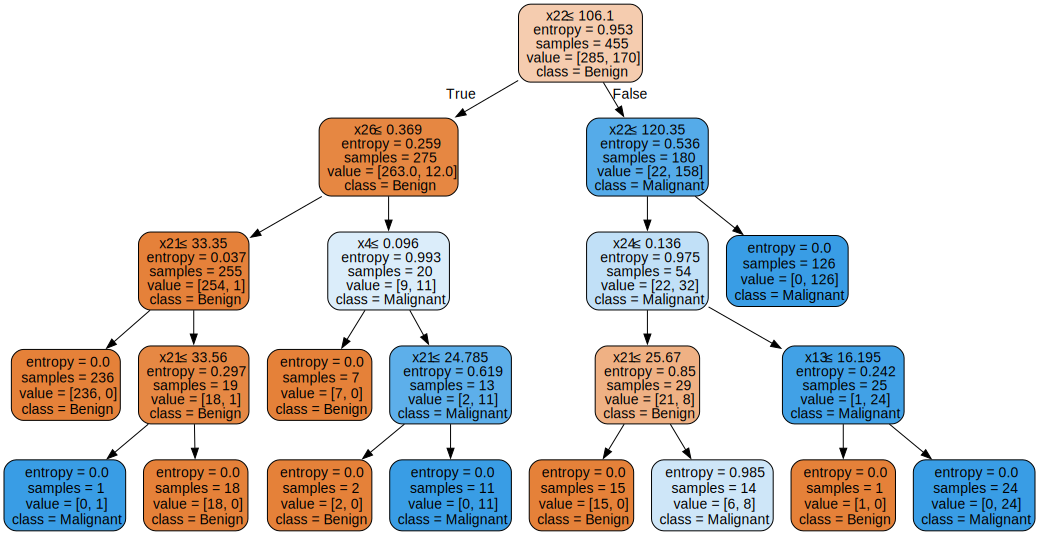

Decision tree classifier for train/test split 80:20 with max depth of 4 built, visualized, and saved.


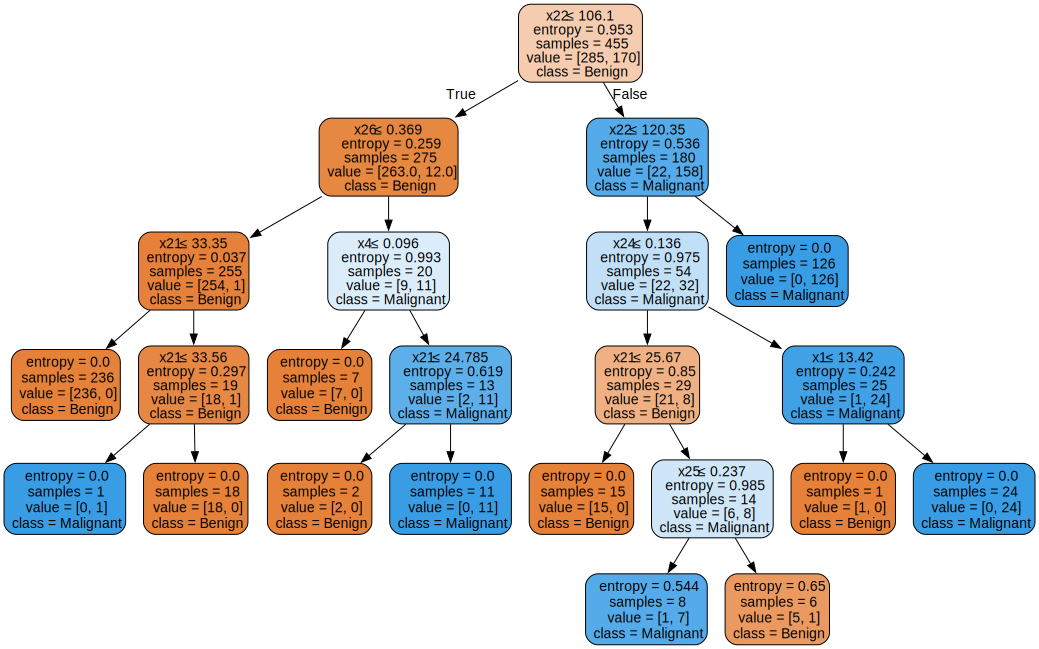

Decision tree classifier for train/test split 80:20 with max depth of 5 built, visualized, and saved.


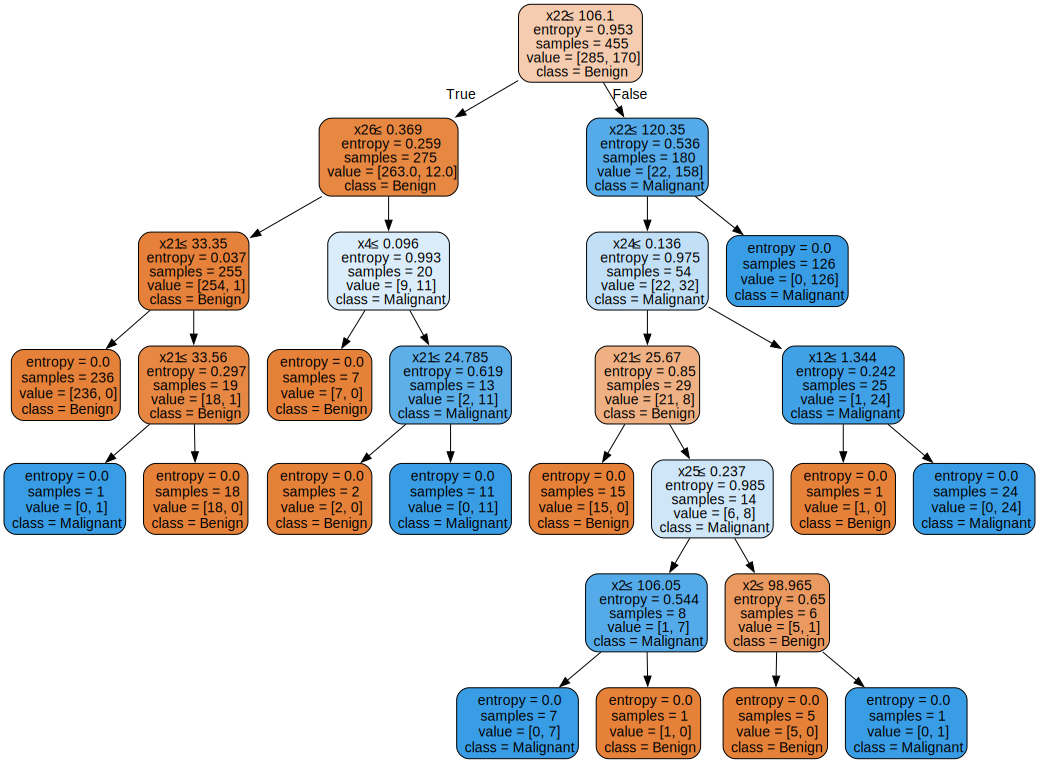

Decision tree classifier for train/test split 80:20 with max depth of 6 built, visualized, and saved.


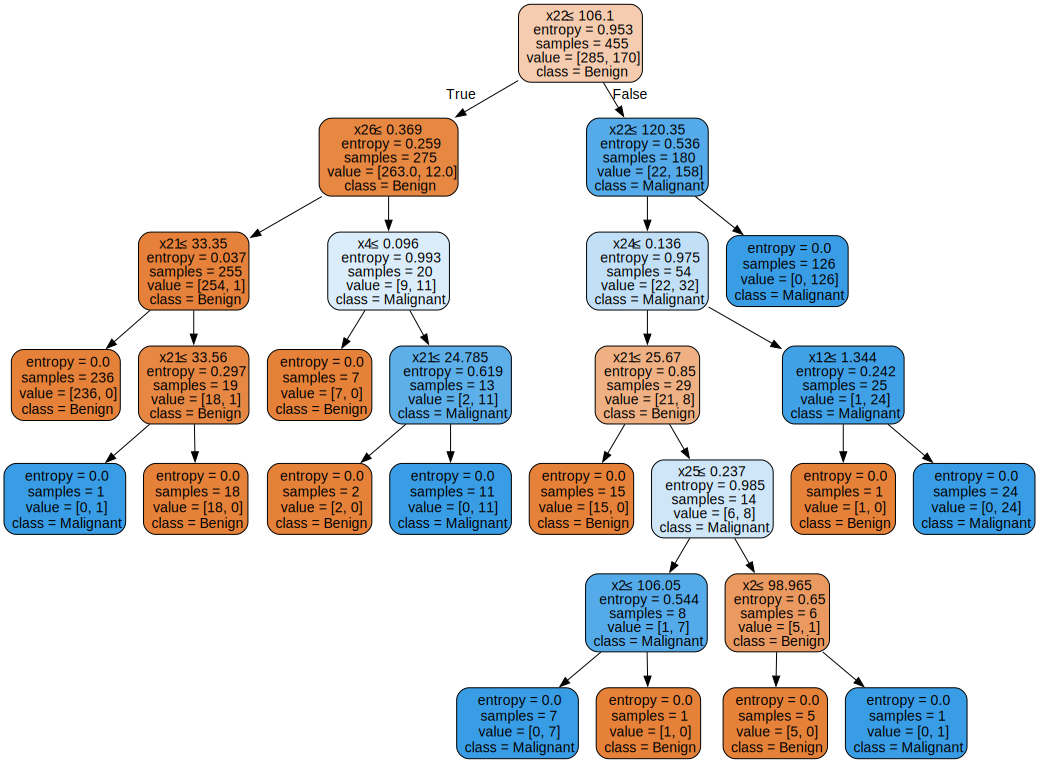

Decision tree classifier for train/test split 80:20 with max depth of 7 built, visualized, and saved.


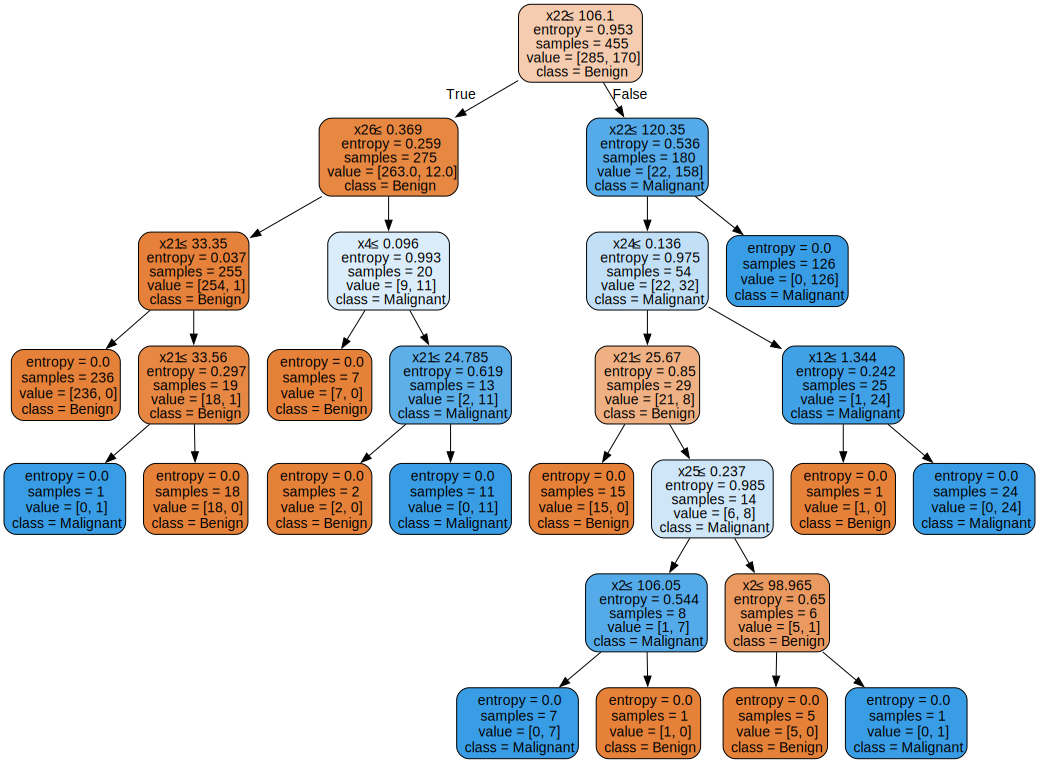

Decision tree classifier for train/test split 80:20 with max depth of None built, visualized, and saved.


In [342]:
visualize_max_depth(list_max_depth_model, list_max_depth, features_name, class_name)


## **5.3 Report of decision tree when changing the value of parameter `max_depth`**


In [343]:
def plot_max_depth_accuracy(accuracy_results_dict, output_path):
    """
    Plots a comparison of max_depth values and their corresponding accuracy scores.

    Args:
        accuracy_results_dict (dict): Dictionary with max_depth as keys and accuracy scores as values.
        output_path (str): Path to save the resulting plot.
    """

    # Prepare the data for the table and plot
    max_depths = list(accuracy_results_dict.keys())
    accuracy_scores = list(accuracy_results_dict.values())
    data = [
        [str(max_depth), accuracy]
        for max_depth, accuracy in zip(max_depths, accuracy_scores)
    ]

    # Create a figure for the plot
    plt.figure(figsize=(15, 6))  # Adjust the figure size as needed

    # Plot the classification report as a table
    plt.subplot(1, 2, 1)

    # Create the table
    table = plt.table(
        cellText=data,
        colLabels=["max_depth", "Accuracy"],
        loc="upper center",
        cellLoc="center",
        colWidths=[0.12, 0.3],
    )

    # Center the table within the subplot
    table.scale(1, 1)  # Adjust the scaling factor as needed
    table.auto_set_font_size(False)
    table.set_fontsize(10)

    # Modify the height of each row to ensure they are evenly spaced
    for (i, j), cell in table.get_celld().items():
        cell.set_height(0.1)  # Adjust the height as needed

    plt.axis("off")  # Turn off axes
    plt.title("Accuracy Report")

    # Plot the accuracy scores as a line plot
    plt.subplot(1, 2, 2)

    # Replace None with "No Limit" for visualization
    max_depths_for_plot = [
        "No Limit" if depth is None else depth for depth in max_depths
    ]

    plt.plot(max_depths_for_plot, accuracy_scores, marker="o", color="red")
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy Score")
    plt.title("Statistical Chart")

    # Set the main title for the entire figure
    plt.suptitle("Decision Tree Classifier With Different Max Depths")

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Save the plot to the specified path
    plt.savefig(output_path)
    plt.show()


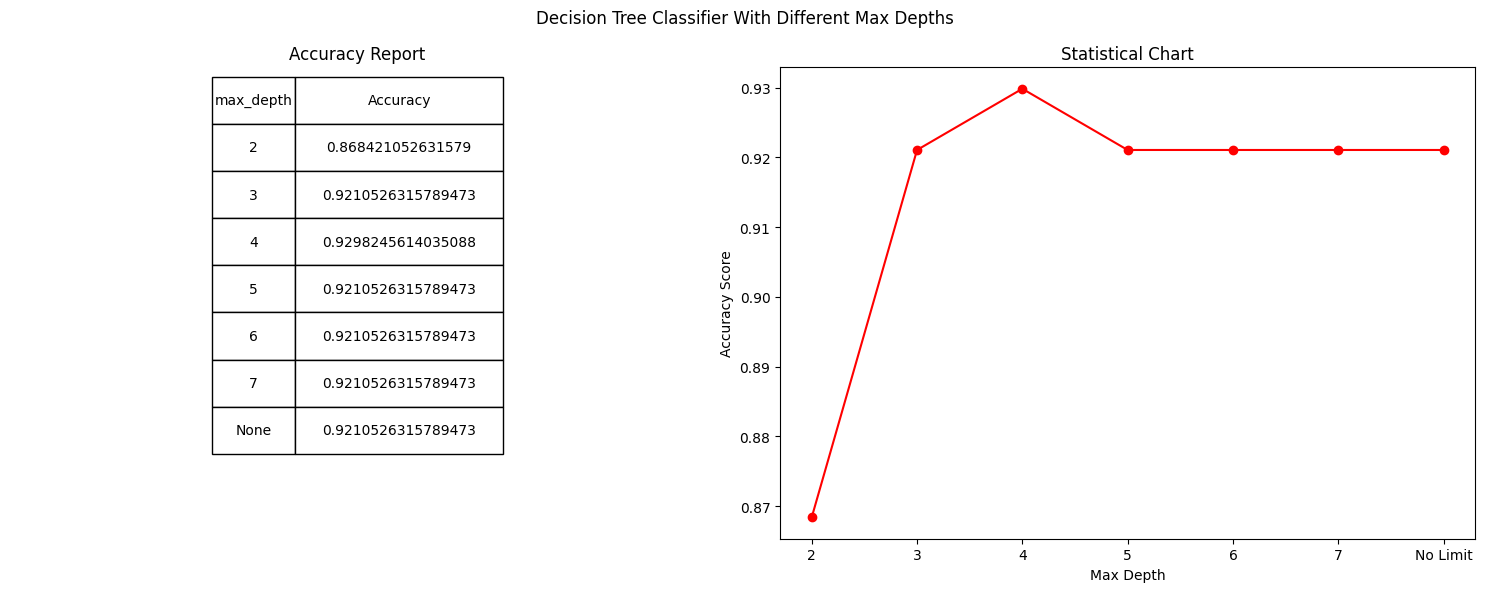

In [344]:
output_path = f"output/report/max_depth_ver/accuracy_report.png"
plot_max_depth_accuracy(accuracy_results, output_path)


## **5.4 Comment on above statistics**


- From the statistical data and line charts measuring the accuracy of decision trees at various depths, it is evident that adjusting the depth of a decision tree significantly impacts its performance.
  - Model with max depth 2: the accuracy score is $86.84\%$, which is the lowest accuracy score among models.
  - Model with max depth 3: the accuracy score is $92.11\%$
  - Model with max depth 4: the accuracy score peaks at $92.98\%$
  - Model with max depth 5 to No Limits (None): the accuracy score remains consistent at $92.11\%$.
- Observations
  - Initially, as the max depth increases from 2 to 4, the accuracy improves significantly from $86.84\%$ to $92.11\%$. This suggests that the model benefits from having more complex decision boundaries up to a certain point.
  - The highest accuracy ($92.98\%$) is achieved at a max depth of 4. Beyond this point, increasing the depth does not improve accuracy; instead, it slightly drops and stabilizes.
  - From max depth 5 onwards, the accuracy plateaus at $92.11\%$. This indicates that adding more complexity to the model (increasing the depth) does not necessarily lead to better performance and might even introduce overfitting.
- Intereption (Reasons)
  - Increase in Accuracy with Depth
    - At max_depth = 2, the accuracy is the lowest ($86.84\%$). This suggests that the model is too simple and may not capture the complexity of the data adequately. This is the underfitting situation.
    - As max_depth increases to 3, the accuracy significantly improves to $92.11\%$, indicating that the model starts to capture more complex patterns in the data.
  - Peak Accuracy
    - At max_depth = 4, the accuracy reaches its highest point ($92.98\%$). This indicates that the model has found an optimal balance between capturing enough information and maintaining simplicity.
  - Stability and Slight Decrease in Accuracy
    - When max_depth is increased to 5, 6, 7, and None (no limit on depth), the accuracy stabilizes at $92.11\%$ and does not increase further.
    - The slight drop from $92.98\%$ to $92.11\%$ at greater depths may indicate overfitting. At these higher depths, the model becomes too complex, potentially capturing noise in the training data, which reduces its ability to generalize well to new, unseen data.
